In [1]:
!pip install gdown

In [2]:
!gdown 1ASrwv4-t9UUtBfiGL8H1MXaBhhELXsBH

Downloading...
From (original): https://drive.google.com/uc?id=1ASrwv4-t9UUtBfiGL8H1MXaBhhELXsBH
From (redirected): https://drive.google.com/uc?id=1ASrwv4-t9UUtBfiGL8H1MXaBhhELXsBH&confirm=t&uuid=51724e67-da28-4886-97e1-3fa0f9452bff
To: /kaggle/working/ai_real_2.zip
100%|███████████████████████████████████████| 2.04G/2.04G [00:09<00:00, 222MB/s]


In [3]:
!unzip -qq /kaggle/working/ai_real_2.zip

In [4]:
!rm /kaggle/working/ai_real_2.zip

In [5]:
train = "/kaggle/working/train"
validation = "/kaggle/working/validation"
test = "/kaggle/working/test"

In [6]:
import pandas as pd
import os

fake_train = os.path.join(train, 'fake')
real_train = os.path.join(train, 'real')

fake_validation = os.path.join(validation, 'fake')
real_validation = os.path.join(validation, 'real')

fake_test = os.path.join(test, 'fake')
real_test = os.path.join(test, 'real')

df = pd.DataFrame(columns=['Train', 'Validation', 'Test'])
df['Train'] = [len(os.listdir(fake_train)), len(os.listdir(real_train))]
df['Validation'] = [len(os.listdir(fake_validation)), len(os.listdir(real_validation))]
df['Test'] = [len(os.listdir(fake_test)), len(os.listdir(real_test))]

df.index = ['Fake', 'Real']
df

,Train,Validation,Test
Fake,18240,6080,6081
Real,18240,6080,6081


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = 224

BATCH_SIZE = 16

train_datagen = ImageDataGenerator(rescale=1.0/255)

validation_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(train,
                                                    batch_size=BATCH_SIZE,
                                                    class_mode='binary',
                                                    classes=['fake', 'real'],
                                                    target_size=(IMG_SIZE, IMG_SIZE),
                                                    shuffle=True,
                                                    seed=123)

validation_generator = validation_datagen.flow_from_directory(validation,
                                                              batch_size=BATCH_SIZE,
                                                              class_mode='binary',
                                                              classes=['fake', 'real'],
                                                              target_size=(IMG_SIZE, IMG_SIZE),
                                                              shuffle=False)



Found 36480 images belonging to 2 classes.
Found 12160 images belonging to 2 classes.


In [8]:
import tensorflow_hub as hub
import tensorflow as tf
import tf_keras

model = tf_keras.Sequential([
    hub.KerasLayer(
        "https://www.kaggle.com/models/spsayakpaul/vision-transformer/TensorFlow2/vit-b16-classification/1",
        trainable=False,
        name="vit_b16_layer"
    ),
    tf_keras.layers.Dense(1, activation='sigmoid', name="output_layer")
])
model.build(input_shape=(None, IMG_SIZE, IMG_SIZE, 3))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vit_b16_layer (KerasLayer)  (None, 1000)              86567656  
                                                                 
 output_layer (Dense)        (None, 1)                 1001      
                                                                 
Total params: 86568657 (330.23 MB)
Trainable params: 1001 (3.91 KB)
Non-trainable params: 86567656 (330.23 MB)
_________________________________________________________________


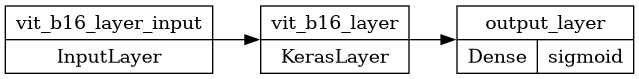

In [10]:
tf_keras.utils.plot_model(
    model,
    rankdir='LR',
    show_layer_activations=True,
    show_layer_names=True
)

In [11]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc', tf_keras.metrics.Precision(), tf_keras.metrics.Recall()])

In [12]:
history = model.fit(train_generator,
                    epochs=10,
                    verbose=1,
                    validation_data=validation_generator,
                    steps_per_epoch=len(train_generator),
                    validation_steps=len(validation_generator)
                    # callbacks=[early_stopping]
                    )

Epoch 1/10


I0000 00:00:1732943859.826501      92 service.cc:145] XLA service 0x7e1548007250 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732943859.826547      92 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1732943859.826553      92 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1732943867.796234     134 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_2', 1300 bytes spill stores, 1284 bytes spill loads

I0000 00:00:1732943870.738867     131 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_5', 1300 bytes spill stores, 1284 bytes spill loads

I0000 00:00:1732943872.990900     132 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_6', 1300 bytes spill stores, 1284 bytes spill loads

I0000 00:00:17

2280/2280 [==============================] - 640s 266ms/step - loss: 0.1152 - acc: 0.9575 - precision: 0.9532 - recall: 0.9621 - val_loss: 0.0865 - val_acc: 0.9711 - val_precision: 0.9677 - val_recall: 0.9747
Epoch 2/10
2280/2280 [==============================] - 622s 273ms/step - loss: 0.0760 - acc: 0.9734 - precision: 0.9702 - recall: 0.9768 - val_loss: 0.0737 - val_acc: 0.9740 - val_precision: 0.9723 - val_recall: 0.9758
Epoch 3/10
2280/2280 [==============================] - 623s 273ms/step - loss: 0.0691 - acc: 0.9756 - precision: 0.9735 - recall: 0.9779 - val_loss: 0.0674 - val_acc: 0.9757 - val_precision: 0.9712 - val_recall: 0.9804
Epoch 4/10
2280/2280 [==============================] - 625s 274ms/step - loss: 0.0634 - acc: 0.9779 - precision: 0.9760 - recall: 0.9799 - val_loss: 0.0640 - val_acc: 0.9766 - val_precision: 0.9698 - val_recall: 0.9837
Epoch 5/10
2280/2280 [==============================] - 624s 274ms/step - loss: 0.0601 - acc: 0.9791 - precision: 0.9774 - recall: 

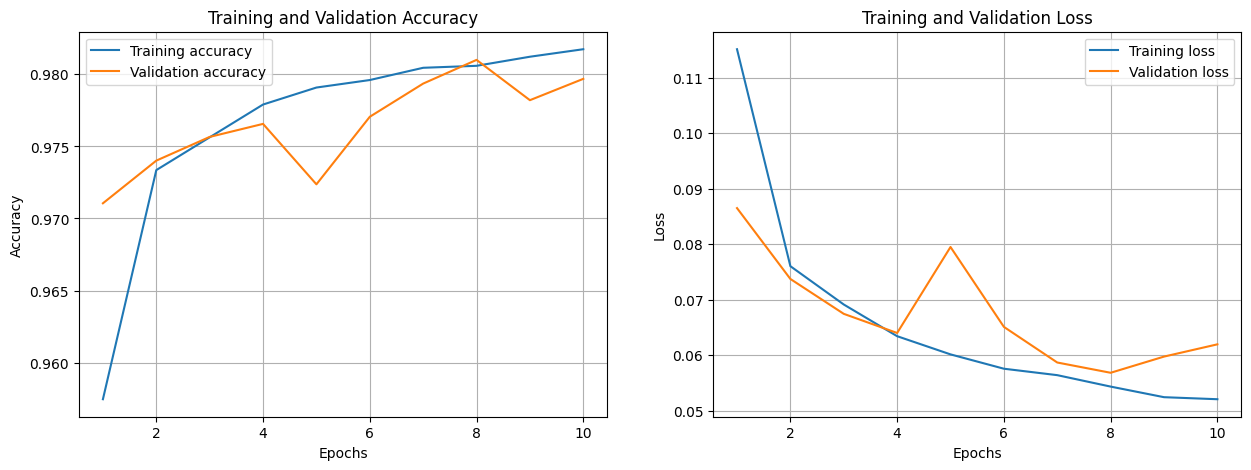

In [14]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].plot(epochs, acc, label='Training accuracy')
ax[0].plot(epochs, val_acc, label='Validation accuracy')
ax[0].set_title('Training and Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend()
ax[0].grid(True)

ax[1].plot(epochs, loss, label='Training loss')
ax[1].plot(epochs, val_loss, label='Validation loss')
ax[1].set_title('Training and Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend()
ax[1].grid(True)

plt.show()

760/760 [==============================] - 156s 205ms/step


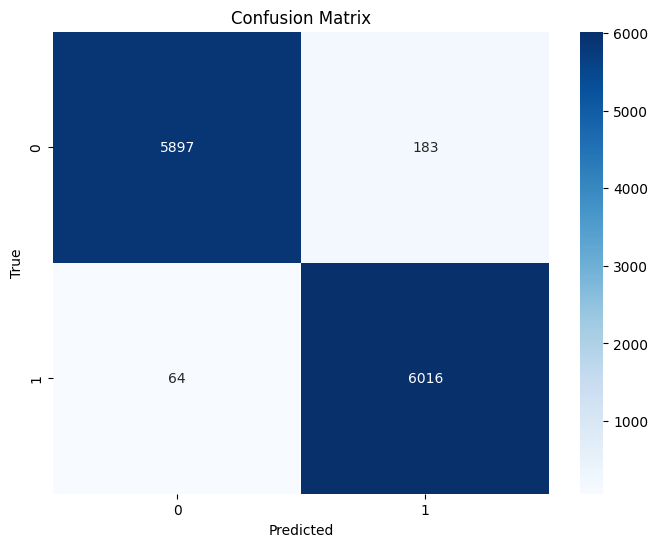

In [15]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

predictions = model.predict(validation_generator, steps=len(validation_generator), verbose=1)
predicted_classes = np.round(predictions)
true_classes = validation_generator.classes

cm = confusion_matrix(true_classes, predicted_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [16]:
from sklearn.metrics import classification_report

print(classification_report(true_classes, predicted_classes))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      6080
           1       0.97      0.99      0.98      6080

    accuracy                           0.98     12160
   macro avg       0.98      0.98      0.98     12160
weighted avg       0.98      0.98      0.98     12160



In [17]:
test_datagen = ImageDataGenerator(rescale=1.0/255)
test_generator = test_datagen.flow_from_directory(test,
                                                  batch_size=BATCH_SIZE,
                                                  class_mode='binary',
                                                  classes=['fake', 'real'],
                                                  target_size=(IMG_SIZE, IMG_SIZE),
                                                  shuffle=False)

Found 12162 images belonging to 2 classes.


In [18]:
test_predictions = model.predict(test_generator, steps=len(test_generator), verbose=1)
test_predicted_classes = np.round(test_predictions)
test_true_classes = test_generator.classes
test_cm = confusion_matrix(test_true_classes, test_predicted_classes)

760/761 [============================>.] - ETA: 0s

I0000 00:00:1732950590.127848     349 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_6', 1300 bytes spill stores, 1284 bytes spill loads

I0000 00:00:1732950590.229032     348 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_109', 1296 bytes spill stores, 1280 bytes spill loads

I0000 00:00:1732950595.186028     350 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_5', 1300 bytes spill stores, 1284 bytes spill loads



761/761 [==============================] - 170s 224ms/step


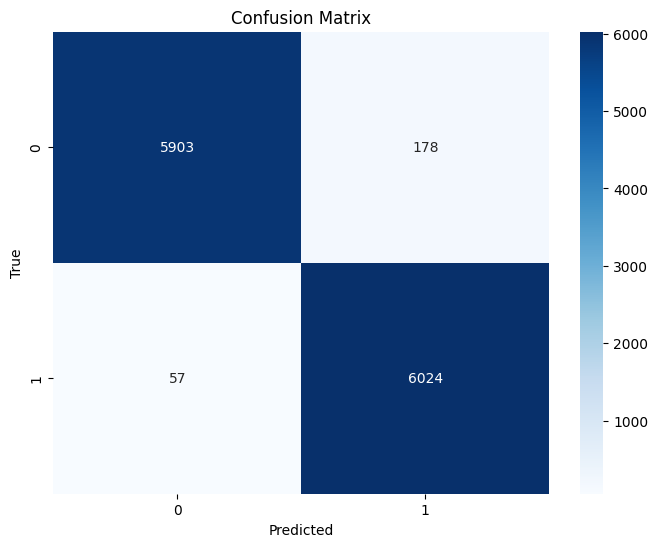

In [19]:
plt.figure(figsize=(8, 6))
sns.heatmap(test_cm, annot=True, cmap="Blues", fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [20]:
print(classification_report(test_true_classes, test_predicted_classes))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      6081
           1       0.97      0.99      0.98      6081

    accuracy                           0.98     12162
   macro avg       0.98      0.98      0.98     12162
weighted avg       0.98      0.98      0.98     12162



In [21]:
model.save('model.keras')